<p align = "center"><strong> STRUCTURAL ANALYSIS UNIDEMENTIONAL</strong> </p>
<p> <b> By : Jefferson C.</b></p>

---

#### __Structural Analysis__

Consiste en analizar los datos para conocer su
variabilidad espacial, evaluar la presencia de anisotropía y determinar los modelos variográficos para cada
variable, para posteriormente proceder a validarlos.


__Condiciones Fundamentales__

- Comportamiento Espacial
    - __Isotropía__ : Fenómeno se comporta igual en todas direcciones
    - __Anisotropía__ : Fenómeno se comporta diferente según la dirección


- Estacionariedad
    - __1 orden__ : Media constante en todo el dominio espacial
    - __2 orden__ : Varianza constante y covarianza dependiente de la distancia de separación

- Enfoque Metodológico

In [1]:
# Dependencies for Algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### __1. Empirical Semivariogram__
__Def.__

Función que __mide cómo varía la similitud de un fenómeno espacial en función de la distancia entre puntos__; indica qué tan parecidos o distintos son los valores a medida que se alejan

__Formula:__

$$
\hat{\gamma}(h) = \frac{1}{2N(h)} \sum_{i=1}^{N(h)} [Z(x_i + h) - Z(x_i) ]^2 \qquad \equiv \qquad \hat{\gamma}(h) = \frac{1}{2N(h)} \sum_{i=1}^{N(h)} [Yi - Xi]^2
$$

donde:

- $\hat{\gamma}(h)$: semivariograma empirico para la distancia $h$.
- $N(h)$: número de pares de puntos separados por la distancia $h$.
- $Z(x_i)$: valor de la variable en la ubicación $x_i$.
- $Z(x_i + h)$: valor de la variable en la ubicación separada por $h$.



__Reference:__

Giraldo Henao, R. (2002). *Introducción a la geoestadística: Teoría y aplicación* (Cap. 3). Universidad Nacional de Colombia. Retrieved from [https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf](https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf)


__Code :__

In [2]:
# Experimental 1D Semivariogram

def semivariogram(Zxi,lag, num_lags):

    """
    Computes the experimental one-dimentional semivariogram

    Parameters
    --------------
    Zxi : Array-like
            Series of spatial values.
    h : Float
            Base distance (lag) between observations, in the same spatial units
    num_lags : Int
            Total numbers of distances (number lags)
    """

    # Convert input to Numpy Array
    Zxi = np.asarray(Zxi,dtype=float)
    # Initialize Gamma Function
    gamma = []

    # Compute semivariogram for each lag
    for h in range(0,num_lags+1):
        # compute lags for each iterations
        lag_iterations = lag*h

        # Initialize iteration variables
        i = 0
        differences = []
        # Iterate over data pairs (separated by lag)
        while i + h < len(Zxi):

            # skip missing values
            if np.isnan(Zxi[i]) or np.isnan(Zxi[i + h]) :
                i += 1
                continue

            # compute square difference
            diff = (Zxi[i + h] - Zxi[i])**2
            differences.append(diff)
            i += 1

        # compute semivariogram
        if len(differences) == 0 :
            gamma.append([lag_iterations,0])
        else:
            gamma.append([lag_iterations,np.round(np.mean(differences)/2,4)])

    return pd.DataFrame(gamma, columns=["Lag [m]","Semivariogram"])

In [3]:
# Inputs
Zxi = [
    4.5, np.nan,6, 6.3,4.6,6.1, 7.3, 7.3, 7.5,np.nan]
lag = 10
num_lags = 6

# Outputs
semivariogram(Zxi, lag,num_lags)

,Lag [m],Semivariogram
0,0,0.0000
1,10,0.5592
2,20,1.0850
3,30,1.3500
4,40,1.3888
5,50,0.9483
6,60,2.5225


#### __2. Empirical Variogram__

__Def.__

Función que mide el __doble de la semivarianza entre valores de un fenómeno espacial en función de la distancia que los separa__, representando la varianza total de las diferencias entre puntos según su separación.

__Formula:__

$$
2 \hat{\gamma}(h) = \frac{1}{N(h)} \sum_{i=1}^{N(h)} [Z(x_i + h) - Z(x_i) ]^2 \qquad \equiv \qquad 2\hat{\gamma}(h) = \frac{1}{N(h)} \sum_{i=1}^{N(h)} [Yi - Xi]^2
$$

donde:

- $2\hat{\gamma}(h)$: variograma empírico para la distancia $h$.
- $N(h)$: número de pares de puntos separados por la distancia $h$.
- $Z(x_i)$: valor de la variable en la ubicación $x_i$.
- $Z(x_i + h)$: valor de la variable en la ubicación separada por $h$.



__Reference:__

Giraldo Henao, R. (2002). *Introducción a la geoestadística: Teoría y aplicación* (Cap. 3). Universidad Nacional de Colombia. Retrieved from [https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf](https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf)

__Code :__

In [4]:
# Experimental 1D Variogram

def variogram(Zxi,lag, num_lags):

    """
    Computes the experimental one-dimentional semivariogram

    Parameters
    --------------
    Zxi : Array-like
            Series of spatial values.
    h : Float
            Base distance (lag) between observations, in the same spatial units
    num_lags : Int
            Total numbers of distances (number lags)
    """

    # Convert input to Numpy Array
    Zxi = np.asarray(Zxi,dtype=float)
    # Initialize Gamma Function
    gamma = []

    # Compute variogram for each lag
    for h in range(0,num_lags+1):
        # compute lags for each iterations
        lag_iterations = lag*h

        # Initialize iteration variables
        i = 0
        differences = []
        # Iterate over data pairs (separated by lag)
        while i + h < len(Zxi):

            # skip missing values
            if np.isnan(Zxi[i]) or np.isnan(Zxi[i + h]) :
                i += 1
                continue

            # compute square difference
            diff = (Zxi[i + h] - Zxi[i])**2
            differences.append(diff)
            i += 1

        # compute semivariogram
        if len(differences) == 0 :
            gamma.append([lag_iterations,0])
        else:
            gamma.append([lag_iterations,2*np.round(np.mean(differences),4)])

    return pd.DataFrame(gamma, columns=["Lag [m]","Variogram"])

In [5]:
# Inputs
Zxi = np.array([6.2,6.4,6.7,6.5,np.nan,6.3,6.6,6.8,np.nan,6.2,6.5,6.7,5.9,6.1,6.4])
lag = 50
num_lags = 9

# Outputs
variogram(Zxi, lag,num_lags)

,Lag [m],Variogram
0,0,0.0000
1,50,0.2400
2,100,0.4734
3,150,0.2124
4,200,0.0400
5,250,0.2742
6,300,0.5166
7,350,0.3934
8,400,0.0800
9,450,0.1520


##### __3. Empirical Covariograms__

__Def.__

__Función que mide la covarianza entre los valores de un fenómeno espacial__ a medida que varía la distancia entre dos puntos. Indica qué tan similares son los valores de la variable a medida que se alejan.

En geostatística, el covariograma __describe cómo la covarianza de una variable cambia con la distancia $h$ entre los puntos de muestreo.__

__Formula:__

$$
\operatorname{\hat{C}(h)} = \frac {1}{n-1} \sum_{i=1}^{n} [(Z(x_i) - \bar{Z}) (Z(x_i + h) - \bar{Z} )] \qquad \equiv  \qquad \operatorname{\hat{C}(h)} = \frac {1}{n-1} \sum_{i=1}^{n} [(X_i - \bar{X}) (Y_i - \bar{Y} )]
$$

donde:

- $\hat{C}(h)$: covariograma empírico para la distancia $h$.
- $Z(x_i)$: valor de la variable en la ubicación $x_i$.
- $Z(x_i + h)$: valor de la variable en la ubicación separada por $h$.
- $\bar{Z}$: media de la variable regionalizada $Z(x_i)$.
- $\bar{X}$: media de los valores de $Z(x_i)$.
- $\bar{Y}$: media de los valores de $Z(x_i+h)$.


__Reference:__

Giraldo Henao, R. (2002). *Introducción a la geoestadística: Teoría y aplicación* (Cap. 3). Universidad Nacional de Colombia. Retrieved from [https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf](https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf)


__Code :__

In [6]:
# Experimental 1D Covariogram

def covariogram(Zxi, lag, num_lags):
    """
    Computes the experimental one-dimensional covariogram.

    Parameters
    ----------
    Zxi : array-like
        Sequence of spatial data values.
    lag : float
        Base lag distance between observations, in the same spatial units.
    num_lags : int
        Total number of lag intervals.
    """

    # Convert input to Numpy array
    Zxi = np.asarray(Zxi, dtype=float)

    # Initialize Covariogram function
    cov = []

    # Compute covariogram for each lag
    for h in range(0, num_lags + 1):
        # Compute lags for each iterations
        lag_distance = h * lag

        # Containers for current lag computation
        operation, variable1, variable2 = [], [], []
        i, n = 0, 0

        # Interate over data pairs (separated by lag )
        while i + h < len(Zxi):

            # Skip missing values
            if np.isnan(Zxi[i]) or np.isnan(Zxi[i + h]):
                i += 1
                continue

            # Store pair of values separated by lag h
            variable1.append(Zxi[i])
            variable2.append(Zxi[i + h])
            i += 1
            n += 1

        # Compute covariance for current lag
        for j in range(n):
            operation.append((variable1[j] - np.mean(variable1)) * (variable2[j] - np.mean(variable2)))

        # Compute covariogram
        if len(operation) == 0:
            cov.append([lag_distance, 0])
        else:
            if n != 1:
                cov.append([lag_distance, np.round(sum(operation) / (n - 1), 4)])
            else:
                print("Indefinite covariance")

    # Return results as a pandas DataFrame
    return pd.DataFrame(cov, columns=["Lag [m]", "Covariogram"])

In [7]:
# Inputs
Zxi = np.array([5,3,6,4,2,1,1,2,4,3,2])
lag = 100
num_lags = 9

# Outputs
covariogram(Zxi, lag,num_lags)

,Lag [m],Covariogram
0,0,2.6000
1,100,1.0222
2,200,0.2778
3,300,-0.8571
4,400,-1.1905
5,500,-0.3000
6,600,0.7500
7,700,-0.5000
8,800,-0.5000
9,900,1.0000


##### __4. Empirical Correlogram__

__Def.__

Función que __mide la correlación entre los valores de un fenómeno espacial a medida que varía la distancia entre dos puntos.__ Indica qué tan similares son los valores de la variable a medida que se alejan.

En geoestadística, el correlograma describe __cómo la correlación de una variable cambia con la distancia $h$ entre los puntos de muestreo.__

__Formula:__

$$
\hat{r}(h) = \frac {\hat{C}(h)}{S_1\cdot S_2 }
$$

donde:

- $\hat{C}(h)$: Covarianza espacial entre pares de puntos separados por distancia h.
- $S_1$: Desviación estandar muestral de $Z(x_i)$
- $S_2$: Desviación estandar muestral de $Z(x_i+h)$

__Reference:__

Giraldo Henao, R. (2002). *Introducción a la geoestadística: Teoría y aplicación* (Cap. 3). Universidad Nacional de Colombia. Retrieved from [https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf](https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf)

__Code :__

In [8]:
# Experimental 1D Correlogram

def correlogram(Zxi,lag,num_lags):
    """
    Computes the experimental one-dimentional correlogram

    Parameters
    ----------------
    Zxi : Array-like
        Series of spatial values.
    h : Float
            Base distance (lag) between observations, in the same spatial units
    num_lags : Int
            Total numbers of distances (number lags)

    """
    # Convert input to Numpy Array
    Zxi = np.asarray(Zxi,dtype=float)

    # Initialize Correlogram Function
    corr = []

    # Compute correlogram for each lag
    for h in range(0,num_lags+1):
        # Compute lags for each iteration
        lag_iterations = h * lag

        # Containers for current lag computation
        operation,variable1,variable2 = [], [], []
        i,n = 0,0

        # Iterate over data pairs (separated by lag)
        while i+h<len(Zxi):

            # Skip missing values
            if np.isnan(Zxi[i]) or np.isnan(Zxi[i+h]):
                i +=1
                continue

            # Store pair of values separated by lag h
            variable1.append(Zxi[i]), variable2.append(Zxi[i+h])
            i +=1
            n +=1

        # Compute correlogram for current lag
        for j in range(n):
            operation.append((variable1[j]- np.mean(variable1))*(variable2[j] - np.mean(variable2)))

        # Compute covariogram
        if len(operation)== 0 :
            corr.append([lag_iterations,0])
        else :
            if n != 1 :
                corr.append([lag_iterations , np.round((np.round(sum(operation)/(n-1),4))/
                             (np.std(variable1,ddof=1)*np.std(variable2,ddof=1)),4)])
            else:
                    print("Indefinite")

    return pd.DataFrame(corr,columns=["N° Lags [m]","Correlogram"])

In [9]:
# Inputs
Zxi = np.array([5,5,7,np.nan,12,11,8,7,2,np.nan,3,3])
lag = 100
num_lags = 3

# Outputs
correlogram(Zxi, lag,num_lags)

,N° Lags [m],Correlogram
0,0,1.0000
1,100,0.7495
2,200,0.3187
3,300,-0.1066


### __Summary Table__

In [10]:

class SpatialData:
    # Constructor: initialize the data, lag distance, and number of lags
    def __init__(self, Zxi, lag, num_lags):
        self.Zxi = np.asarray(Zxi, dtype=float)
        self.lag = lag
        self.num_lags = num_lags

    # Method to compute the semivariogram
    def semivariogram(self):
        gamma = []
        for h in range(0, self.num_lags+1):
            lag_distance = h*self.lag
            # Calculate squared differences for valid data points
            differences = [(self.Zxi[i+h]-self.Zxi[i])**2
                           for i in range(len(self.Zxi)-h)
                           if not (np.isnan(self.Zxi[i]) or np.isnan(self.Zxi[i+h]))]
            # Compute semivariance; divide mean squared differences by 2
            semivar = 0 if len(differences)==0 else np.round(np.mean(differences)/2,4)
            gamma.append([lag_distance, semivar])
        return pd.DataFrame(gamma, columns=["Lag [m]", "Semivariogram"])

    # Method to compute the variogram (2 * semivariance)
    def variogram(self):
        gamma = []
        for h in range(0, self.num_lags+1):
            lag_distance = h*self.lag
            differences = [(self.Zxi[i+h]-self.Zxi[i])**2
                           for i in range(len(self.Zxi)-h)
                           if not (np.isnan(self.Zxi[i]) or np.isnan(self.Zxi[i+h]))]
            vario = 0 if len(differences)==0 else 2*np.round(np.mean(differences),4)
            gamma.append([lag_distance, vario])
        return pd.DataFrame(gamma, columns=["Lag [m]", "Variogram"])

    # Method to compute the covariogram (covariance at each lag)
    def covariogram(self):
        cov = []
        for h in range(0, self.num_lags+1):
            lag_distance = h*self.lag
            # Filter out NaNs
            variable1 = [self.Zxi[i] for i in range(len(self.Zxi)-h) if not np.isnan(self.Zxi[i]) and not np.isnan(self.Zxi[i+h])]
            variable2 = [self.Zxi[i+h] for i in range(len(self.Zxi)-h) if not np.isnan(self.Zxi[i]) and not np.isnan(self.Zxi[i+h])]
            n = len(variable1)
            if n>1:
                # Covariance formula: sum((x-mean_x)*(y-mean_y)) / (n-1)
                operation = [(variable1[j]-np.mean(variable1))*(variable2[j]-np.mean(variable2)) for j in range(n)]
                cov_value = np.round(sum(operation)/(n-1),4)
            else:
                cov_value = 0
            cov.append([lag_distance, cov_value])
        return pd.DataFrame(cov, columns=["Lag [m]", "Covariogram"])

    # Method to compute the correlogram (correlation at each lag)
    def correlogram(self):
        corr = []
        for h in range(0, self.num_lags+1):
            lag_distance = h*self.lag
            variable1 = [self.Zxi[i] for i in range(len(self.Zxi)-h) if not np.isnan(self.Zxi[i]) and not np.isnan(self.Zxi[i+h])]
            variable2 = [self.Zxi[i+h] for i in range(len(self.Zxi)-h) if not np.isnan(self.Zxi[i]) and not np.isnan(self.Zxi[i+h])]
            n = len(variable1)
            if n>1:
                # Correlation formula: covariance / (std_x * std_y)
                operation = [(variable1[j]-np.mean(variable1))*(variable2[j]-np.mean(variable2)) for j in range(n)]
                corr_value = np.round((sum(operation)/(n-1)) / (np.std(variable1, ddof=1)*np.std(variable2, ddof=1)),4)
            else:
                corr_value = 0
            corr.append([lag_distance, corr_value])
        return pd.DataFrame(corr, columns=["Lag [m]", "Correlogram"])

    # Combine all computed metrics into a single summary table
    def summary_table(self):
        semi = self.semivariogram()
        vario = self.variogram()
        cov = self.covariogram()
        corr = self.correlogram()
        summary = semi.merge(vario, on="Lag [m]").merge(cov, on="Lag [m]").merge(corr, on="Lag [m]")
        return summary

    # Compute descriptive statistics for semivariogram, variogram, covariogram, and correlogram
    def summary_statistics(self):
        summary = self.summary_table()
        stats = summary.drop(columns=["Lag [m]"]).describe().T
        stats = stats[['mean','std','min','25%','50%','75%','max']]
        return stats

    # Plot all spatial metrics in a 2x2 grid
    def plot_all(self):
        df = self.summary_table()
        fig, axes = plt.subplots(2,2, figsize=(12,8))

        # Semivariogram plot
        axes[0,0].plot(df["Lag [m]"], df["Semivariogram"], marker='o', color='blue')
        axes[0,0].set_title("Semivariogram", fontweight='bold')
        axes[0,0].set_xlabel("Lag [m]")
        axes[0,0].set_ylabel("Semivariogram")

        # Variogram plot
        axes[0,1].plot(df["Lag [m]"], df["Variogram"], marker='o', color='green', )
        axes[0,1].set_title("Variogram",fontweight='bold')
        axes[0,1].set_xlabel("Lag [m]")
        axes[0,1].set_ylabel("Variogram")

        # Covariogram plot
        axes[1,0].plot(df["Lag [m]"], df["Covariogram"], marker='o', color='red')
        axes[1,0].set_title("Covariogram",fontweight='bold')
        axes[1,0].set_xlabel("Lag [m]")
        axes[1,0].set_ylabel("Covariance")

        # Correlogram plot
        axes[1,1].plot(df["Lag [m]"], df["Correlogram"], marker='o', color='purple')
        axes[1,1].set_title("Correlogram",fontweight='bold')
        axes[1,1].set_xlabel("Lag [m]")
        axes[1,1].set_ylabel("Correlation")

        plt.tight_layout()
        plt.show()


In [16]:

# input
Zxi = [5,3,6,4,2,1,1,2,4,3]
lag = 100
num_lags = 5

# call class
spatial = SpatialData(Zxi, lag, num_lags)

# metrics
spatial.summary_table()

,Lag [m],Semivariogram,Variogram,Covariogram,Correlogram
0,0,0.0000,0.0000,2.7667,1.0000
1,100,1.5556,6.2222,1.1389,0.3996
2,200,2.4375,9.7500,0.4286,0.1340
3,300,3.5000,14.0000,-1.0714,-0.4314
4,400,4.1667,16.6666,-1.5000,-0.6858
5,500,3.7000,14.8000,-0.5000,-0.2425


In [12]:
# Descriptive Statistics
spatial.summary_statistics()

,mean,std,min,25%,50%,75%,max
Semivariogram,2.559967,1.571121,0.0000,1.776075,2.96875,3.650000,4.1667
Variogram,10.239800,6.284470,0.0000,7.104150,11.87500,14.600000,16.6666
Covariogram,0.210467,1.582248,-1.5000,-0.928550,-0.03570,0.961325,2.7667
Correlogram,0.028983,0.614464,-0.6858,-0.384175,-0.05425,0.333200,1.0000


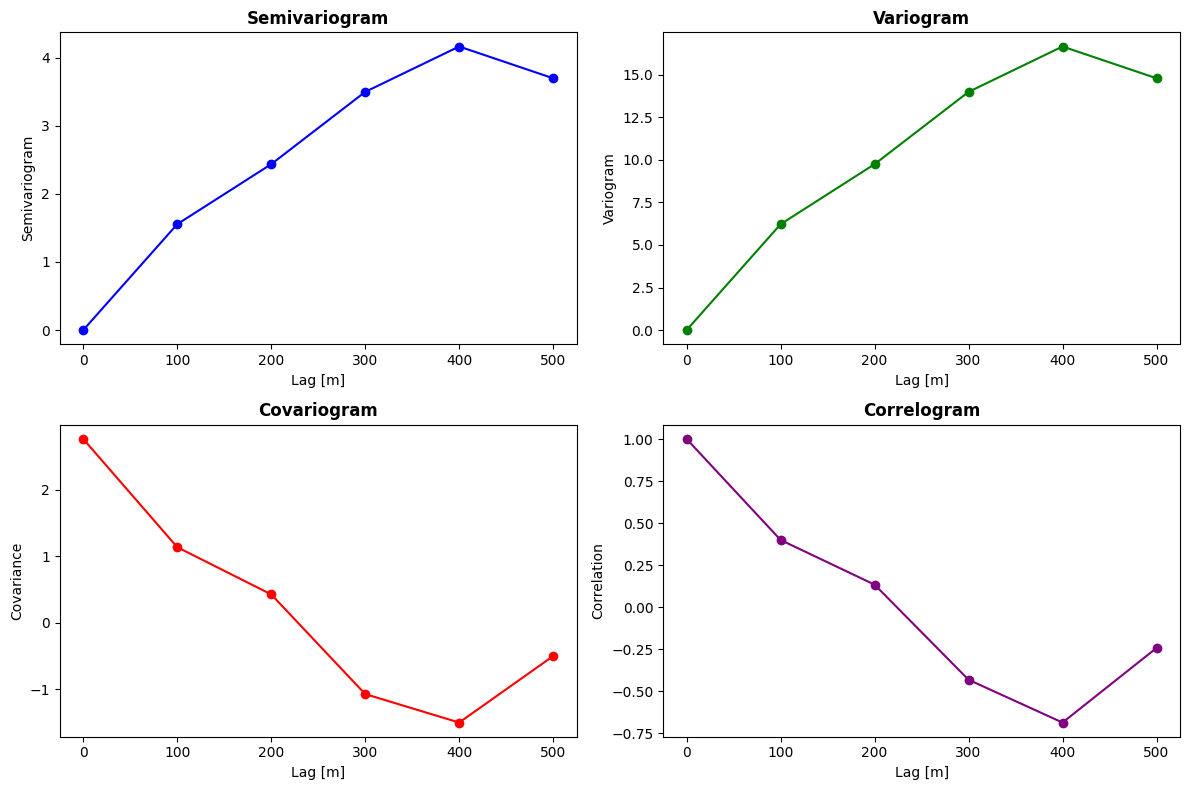

In [13]:
# Graph
spatial.plot_all()

---